In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import pickle

## Loading Original Phase Space and Our Data

In [5]:
METADATA_FP = "data/meta.csv"

In [8]:
PD_DATA_FOLDER = "data/phase_diagrams"
GROUP = 'adni_z'
PD_M_PATH = os.path.join(PD_DATA_FOLDER, "pd_m_sample.dat")
PD_C_PATH = os.path.join(PD_DATA_FOLDER, "pd_C_sample.dat")
PD_CHISG_SML_PATH = os.path.join(PD_DATA_FOLDER, "pd_chiSG_sample.dat")
PD_CHISG_PATH = os.path.join(PD_DATA_FOLDER, f"pd_chiSG_{GROUP}.dat")
PD_CHIUNI_SML_PATH = os.path.join(PD_DATA_FOLDER, "pd_chiUni_sample.dat")
PD_CHIUNI_PATH = os.path.join(PD_DATA_FOLDER, f"pd_chiUni_{GROUP}.dat")
MU_LIST_PATH = os.path.join(PD_DATA_FOLDER, f"mu_list_{GROUP}.dat")
MU_LIST_SML_PATH = os.path.join(PD_DATA_FOLDER, "mu_list_sample.dat")
SIGMA_LIST_PATH = os.path.join(PD_DATA_FOLDER, f"sigma_list_{GROUP}.dat")
SIGMA_LIST_SML_PATH = os.path.join(PD_DATA_FOLDER, "sigma_list_sample.dat")
PD_RESULTS_FP = "results/results_ad.csv"
AB_RESULTS_FP =  "results/results_abide.csv"

In [9]:
metadata = pd.read_csv(METADATA_FP)
metadata_ab = pd.read_csv('data/metadata.csv')
results = pd.read_csv(PD_RESULTS_FP)
results_abide = pd.read_csv(AB_RESULTS_FP)

In [60]:
combined_data_abide = []

for i in range(len(results)):
    row = results_abide.iloc[i]
    data = [ 
        row["SUB_ID"],
        metadata_ab[metadata_ab["SUB_ID"] == row["SUB_ID"] ]["DX_GROUP"].iloc[0],
        row["mu"],
        row["sigma"],
        # metadata_ab[metadata_ab["SUB_ID"] == row["SUB_ID"] ]["PIQ"].iloc[0],
        metadata_ab[metadata_ab["SUB_ID"] == row["SUB_ID"] ]["AGE_AT_SCAN"].iloc[0],
    ]
    combined_data_abide.append(data)
    
combined_data_ab = pd.DataFrame(combined_data_abide, columns=["SUB_ID", "DX_GROUP", "mu", "sigma", "AGE"])

In [10]:
combined_data = []

for i in range(len(results)):
    row = results.iloc[i]
    data = [ 
        row["SUB_ID"],
        metadata[metadata["SUB_ID"] == row["SUB_ID"] ]["DX_GROUP"].iloc[0],
        row["mu"],
        row["sigma"],
        # metadata[metadata["SUB_ID"] == row["SUB_ID"] ]["PIQ"].iloc[0],
        metadata[metadata["SUB_ID"] == row["SUB_ID"] ]["AGE_AT_SCAN"].iloc[0],
    ]
    combined_data.append(data)
    
combined_data = pd.DataFrame(combined_data, columns=["SUB_ID", "DX_GROUP", "mu", "sigma", "AGE"])


IndexError: single positional indexer is out-of-bounds

In [104]:
mus_new, sigmas_new = np.loadtxt(MU_LIST_PATH), np.loadtxt(SIGMA_LIST_PATH)
mus, sigmas = np.loadtxt(MU_LIST_SML_PATH), np.loadtxt(SIGMA_LIST_SML_PATH)

In [105]:
mus_new

array([-0.01 , -0.008, -0.006, -0.004, -0.002,  0.   ,  0.002,  0.004,
        0.006,  0.008,  0.01 ,  0.012,  0.014,  0.016,  0.018,  0.02 ])

In [127]:
lines = open("/home/shivansh.seth/phase_diagram_analysis/res_adni.csv", 'r').readlines()
dt = []
for line in lines:
    if len(line.split(",")) == 3:
        if '' not in line.split(","):
            dt.append(line)

In [128]:
len(dt)

71

In [129]:
cn_subs = list(map(str.strip, open("cn_subject_names.txt", "r").readlines()))
ad_subs = list(map(str.strip, open("ad_subject_names.txt", "r").readlines()))

In [130]:
newdt = []
for i in range(len(dt)):
    d = dt[i].split(",")
    subn = d[0].split("-")[-1]
    if subn == 'SUB_ID':
        continue
    if subn in cn_subs:
        diag = 0
    else:
        diag = 1
    newdt.append([ subn, float(d[1]), float(d[2].strip()), diag ])
newdt

[['002_S_4264', 0.004364, 0.027867, 0],
 ['002_S_4270', 0.002868, 0.029173, 0],
 ['002_S_5018', 0.003331, 0.026569, 1],
 ['006_S_0498', 0.003083, 0.029443, 0],
 ['006_S_0731', 0.002201, 0.026979, 0],
 ['006_S_4153', 0.00208, 0.028116, 1],
 ['006_S_4192', 0.000896, 0.025481, 1],
 ['006_S_4449', 0.008566, 0.040998, 0],
 ['006_S_4485', 0.001524, 0.026237, 0],
 ['006_S_4546', 0.001736, 0.025814, 1],
 ['010_S_4345', 0.00156, 0.027488, 0],
 ['010_S_4442', 0.002554, 0.026046, 0],
 ['010_S_5163', 0.001992, 0.025225, 1],
 ['012_S_4026', 0.001935, 0.026382, 0],
 ['002_S_4264', 0.004364, 0.027867, 0],
 ['002_S_4270', 0.002868, 0.029173, 0],
 ['002_S_5018', 0.003331, 0.026569, 1],
 ['006_S_0498', 0.003083, 0.029443, 0],
 ['006_S_0731', 0.002201, 0.026979, 0],
 ['006_S_4153', 0.00208, 0.028116, 1],
 ['006_S_4192', 0.000896, 0.025481, 1],
 ['006_S_4449', 0.008566, 0.040998, 0],
 ['006_S_4485', 0.001524, 0.026237, 0],
 ['006_S_4546', 0.001736, 0.025814, 1],
 ['010_S_4345', 0.00156, 0.027488, 0],
 ['0

In [131]:
data_pd = pd.DataFrame(newdt[1:], columns=['SUB_ID', 'mu', 'sigma', 'diag'])
data_pd

,SUB_ID,mu,sigma,diag
0,002_S_4270,0.002868,0.029173,0
1,002_S_5018,0.003331,0.026569,1
2,006_S_0498,0.003083,0.029443,0
3,006_S_0731,0.002201,0.026979,0
4,006_S_4153,0.002080,0.028116,1
...,...,...,...,...
63,131_S_5138,0.003995,0.026651,1
64,136_S_4269,0.001966,0.029409,0
65,136_S_4433,0.003417,0.026134,0
66,136_S_4726,0.002430,0.027336,0


In [132]:
mu_vals = data_pd['mu'].to_list()
sigma_vals = data_pd['sigma'].to_list()

cn_mu_vals = data_pd[data_pd['diag'] == 0]['mu'].to_list()
ad_mu_vals = data_pd[data_pd['diag'] == 1]['mu'].to_list()

cn_sigma_vals = data_pd[data_pd['diag'] == 0]['sigma'].to_list()
ad_sigma_vals = data_pd[data_pd['diag'] == 1]['sigma'].to_list()


# Comparing Phase space from AD data

In [115]:
!pwd

/home/shivansh.seth/phase_diagram_analysis


In [133]:
# m = np.loadtxt(PD_M_PATH)
# c = np.loadtxt(PD_C_PATH)
chi_sg = np.loadtxt(PD_CHISG_SML_PATH)
chi_uni = np.loadtxt(PD_CHIUNI_SML_PATH)
chi_sg_new = np.loadtxt(PD_CHISG_PATH)
chi_uni_new = np.loadtxt(PD_CHIUNI_PATH)

In [134]:
chi_sg_new.shape

(16, 16)

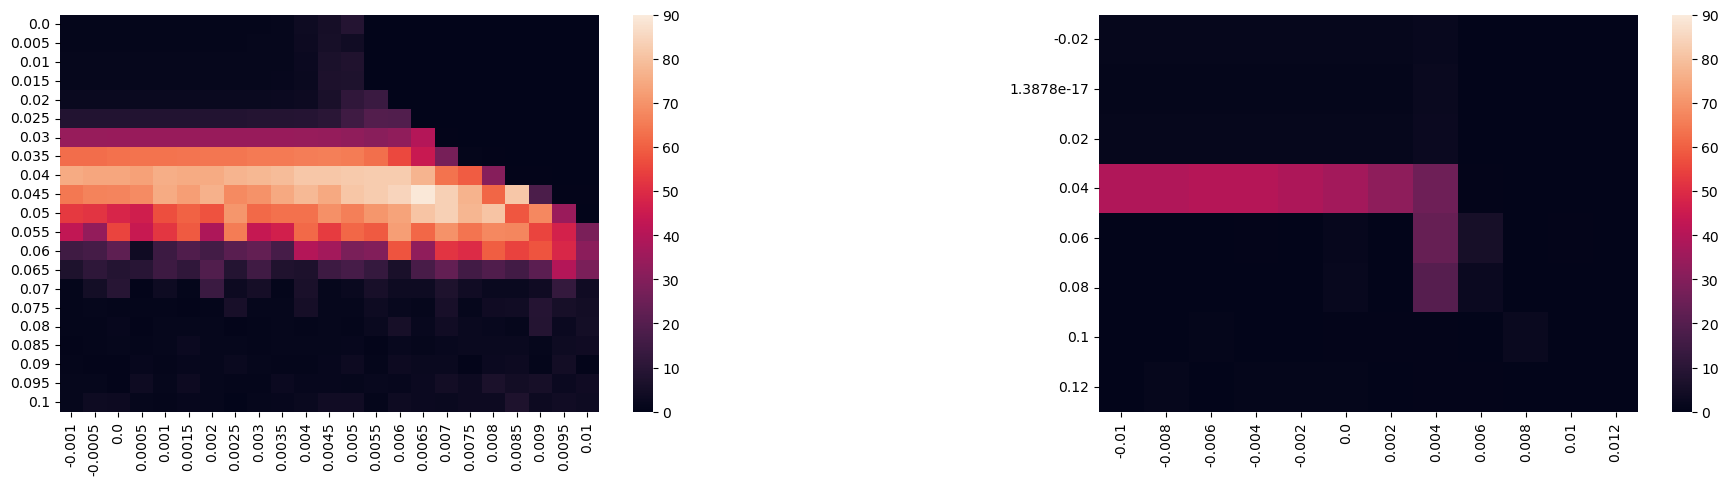

In [135]:
fig, axs = plt.subplots(ncols=2)
sns.heatmap(chi_sg.T, ax=axs[0], label='sample', xticklabels=mus, yticklabels=sigmas, vmin=0, vmax=90)
sns.heatmap(chi_sg_new.T[4:12, :12], ax=axs[1], label='AD data', xticklabels=mus_new[:12], yticklabels=sigmas_new[4:12], vmin=0, vmax=90)
fig.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

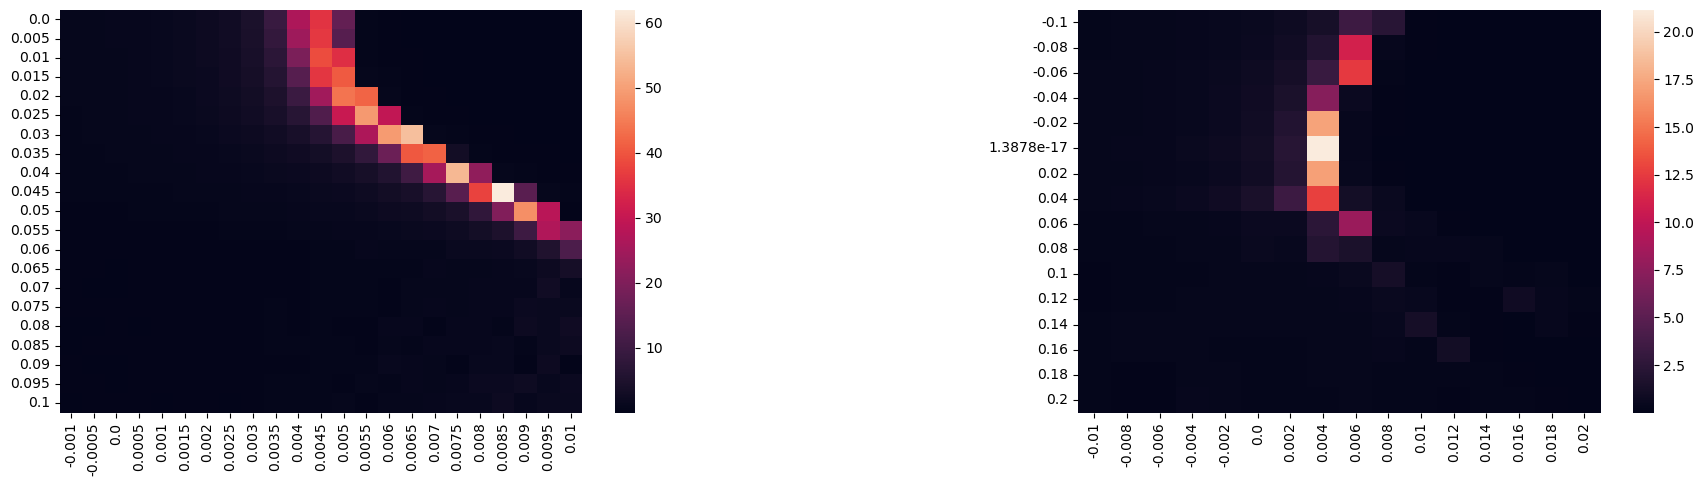

In [136]:
fig, axs = plt.subplots(ncols=2)
sns.heatmap(chi_uni.T, ax=axs[0], label='sample', xticklabels=mus, yticklabels=sigmas)
sns.heatmap(chi_uni_new.T, ax=axs[1], label='AD data', xticklabels=mus_new, yticklabels=sigmas_new)
fig.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

In [79]:
cutoff = 110
asd_pos_mus, asd_pos_sigmas = \
    np.array(combined_data_ab[combined_data_ab["DX_GROUP"] == 1]["mu"].tolist()), \
    np.array(combined_data_ab[combined_data_ab["DX_GROUP"] == 1]["sigma"].tolist())
asd_neg_mus, asd_neg_sigmas = \
    np.array(combined_data_ab[combined_data_ab["DX_GROUP"] == 2]["mu"].tolist()), \
    np.array(combined_data_ab[combined_data_ab["DX_GROUP"] == 2]["sigma"].tolist())

asd_pos_mus, asd_pos_sigmas = 

In [53]:
ad_mus, ad_sigmas = \
    np.array(combined_data[combined_data["DX_GROUP"] == 'AD']["mu"].tolist()), \
    np.array(combined_data[combined_data["DX_GROUP"] == 'AD']["sigma"].tolist())
mci_mus, mci_sigmas = \
    np.array(combined_data[combined_data["DX_GROUP"] != 'AD']["mu"].tolist()), \
    np.array(combined_data[combined_data["DX_GROUP"] != 'AD']["sigma"].tolist())

In [137]:
len(ad_mu_vals), len(cn_mu_vals)

(25, 43)

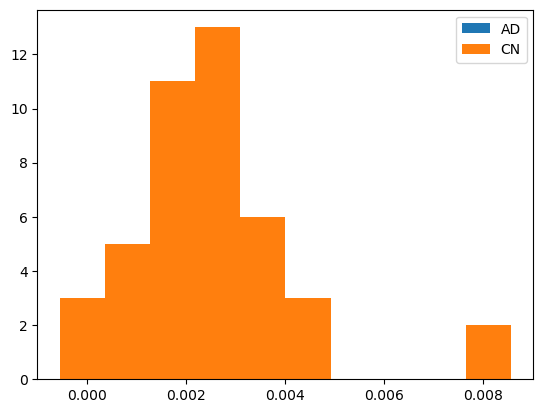

In [138]:
plt.hist(ad_mu_vals, label='AD')
plt.hist(cn_mu_vals, label='CN')
plt.legend()

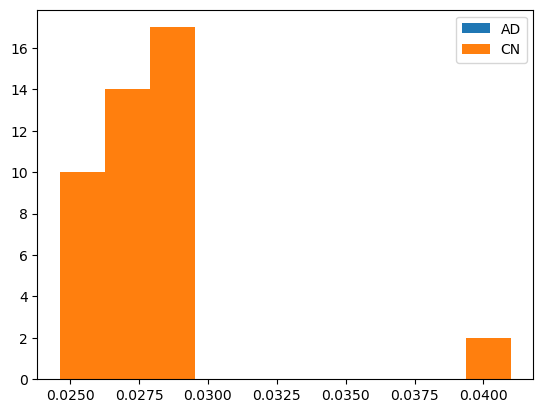

In [139]:
plt.hist(ad_sigma_vals, label='AD')
plt.hist(cn_sigma_vals, label='CN')
plt.legend()

(-0.001, 0.03)

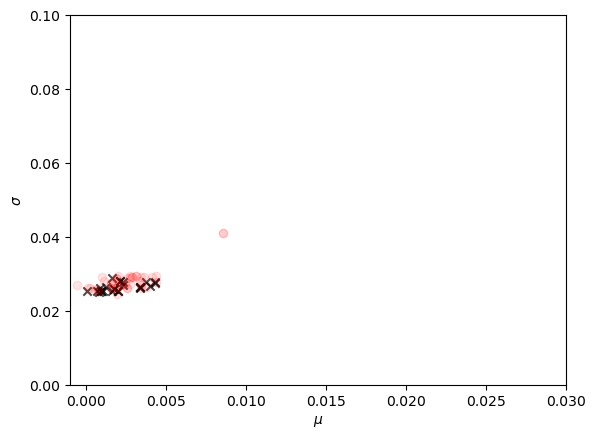

In [142]:
plt.scatter(ad_mu_vals, ad_sigma_vals, marker='x', color='black', alpha=0.7)
plt.scatter(cn_mu_vals, cn_sigma_vals, color='red', alpha=0.1)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.ylim(0, 0.1)
plt.xlim(-0.001, 0.03)

In [144]:
print(np.mean(ad_mu_vals), np.mean(cn_mu_vals))
print(np.mean(ad_sigma_vals), np.mean(cn_sigma_vals))

0.00208696 0.002531744186046512
0.02643192 0.028201209302325583


#############################################
### Temp start

In [170]:
from nilearn.image import load_img

In [171]:
# fp = '/scratch/shivansh.seth/adni/data/subjects/019_S_5012/func.nii.gz'
fp = '/scratch/shivansh.seth/adni/output/preproc/sub-019_S_5012/fwhm-5_sfunc.nii'
# ts = np.loadtxt(fp)
ts = load_img(fp).get_fdata()
ydat = ts

In [172]:
ts.shape

(51, 67, 67, 140)

In [174]:
gs = np.mean(ts, axis=(0,1,2,))
gs

array([159958.80044638, 151882.9132854 , 149065.66292279, 149753.69422827,
       150228.97065647, 150094.31531082, 150208.20782903, 150139.31215316,
       150168.5397834 , 150233.56895923, 150317.54029369, 150223.54847039,
       150357.85141404, 150796.55697887, 150892.57719871, 151092.91542689,
       151177.58524975, 150937.57492915, 151059.55996307, 150505.39361407,
       149865.66154305, 150541.95296241, 151737.42041057, 150585.52179962,
       149471.68608442, 151621.52861348, 151200.12874698, 149407.88524676,
       150737.36045887, 152158.68786464, 150334.2107743 , 149532.3734044 ,
       150844.19173231, 151518.86019961, 151089.76819994, 150169.47364411,
       149553.44414824, 149831.55210333, 150210.26117819, 150308.65006785,
       151005.87542939, 151570.36119245, 149799.98794161, 149547.94122604,
       150627.39332836, 151784.54017328, 150956.4399362 , 149412.60167629,
       150077.59514854, 151272.13464018, 151352.33432686, 150933.65971882,
       150621.1350947 , 1

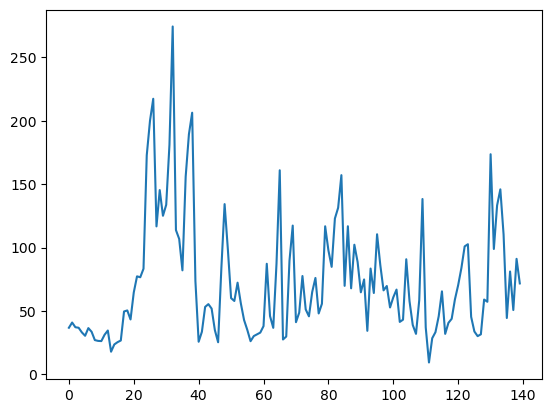

In [175]:
temp = ts[2][3][5]
plt.plot(range(len(temp)), temp)

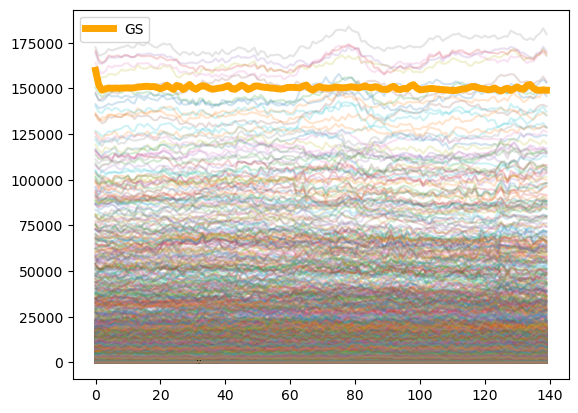

In [178]:
for yreg in range(ts.shape[1]):
    for zreg in range(ts.shape[2]):
        ydat = ts[45][yreg][zreg]
        plt.plot(range(len(ydat)), ydat, alpha=0.2)
        
plt.plot(range(len(gs)), gs, label="GS", linestyle='-', color='orange', linewidth=5)
plt.legend()

### Temp end <br/>
#################################################################

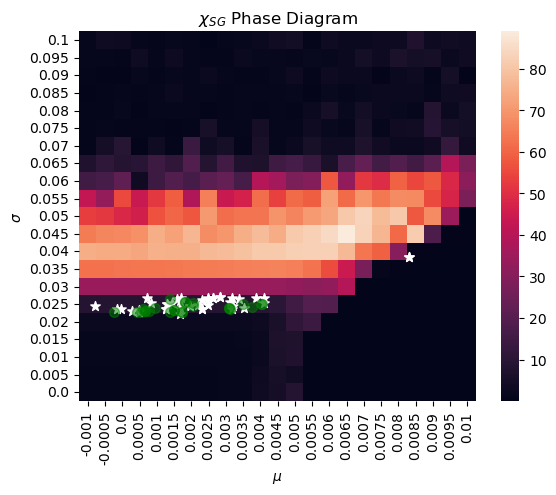

In [146]:
ax = sns.heatmap(chi_sg.T, xticklabels=mus, yticklabels=sigmas)
ax.invert_yaxis()
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("$\chi_{SG}$ Phase Diagram")



x_idx = np.interp(cn_mu_vals, mus, range(len(mus)))
y_idx = np.interp(cn_sigma_vals, sigmas, range(len(sigmas)))
ax.scatter(x_idx, y_idx, color='white', marker='*', s=50)

x_idx = np.interp(ad_mu_vals, mus, range(len(mus)))
y_idx = np.interp(ad_sigma_vals, sigmas, range(len(sigmas)))
ax.scatter(x_idx, y_idx, color='green', s=50, alpha=0.5)

# x_idx = np.interp(asd_neg_mus, mus, range(len(mus)))
# y_idx = np.interp(asd_neg_sigmas, sigmas, range(len(sigmas)))
# ax.scatter(x_idx, y_idx, color='red', s=50, alpha=0.5)

x_idx = np.interp([ 0.003, 0.0045 ], mus, range(len(mus)))
# plt.xlim(x_idx[0], x_idx[1])
y_idx = np.interp([ 0.001, 0.025 ], sigmas, range(len(sigmas)))
# plt.ylim(y_idx[0], y_idx[1])

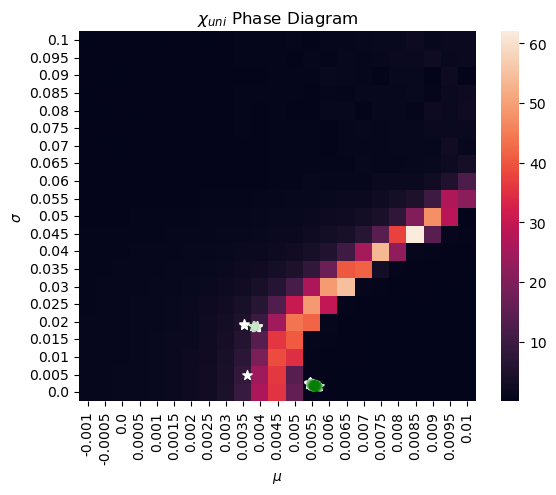

In [72]:
ax = sns.heatmap(chi_uni.T, xticklabels=mus, yticklabels=sigmas)
ax.invert_yaxis()
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("$\chi_{uni}$ Phase Diagram")



x_idx = np.interp(mci_mus, mus, range(len(mus)))
y_idx = np.interp(mci_sigmas, sigmas, range(len(sigmas)))
ax.scatter(x_idx, y_idx, color='white', marker='*', s=50)

x_idx = np.interp(ad_mus, mus, range(len(mus)))
y_idx = np.interp(ad_sigmas, sigmas, range(len(sigmas)))
ax.scatter(x_idx, y_idx, color='green', s=50, alpha=0.1)

plt.show()

## Timeseries

In [38]:
ts_fp = '/home/anirudh/Research/Brain/Datasets/abide/AAL/50996_timeseries.txt'

ts = np.loadtxt(ts_fp)
ts.shape

(176, 116)

Text(0.5, 15.0, '$t$')

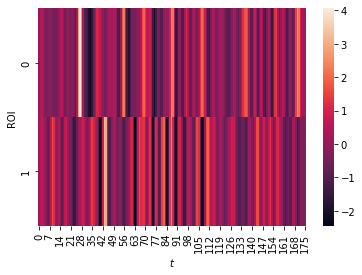

In [43]:
sns.heatmap(ts.T[1:3, :])
plt.ylabel("ROI")
plt.xlabel("$t$")


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Calculations

*(Can be run independently)*

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join
import subprocess
import shutil
from nilearn import datasets, image
from nilearn.image import load_img, index_img
from nilearn.plotting import plot_epi
from nilearn.maskers import NiftiLabelsMasker, NiftiSpheresMasker
from nilearn.datasets import fetch_coords_power_2011

In [9]:
# fp = '/home/shivansh.seth/phase_diagram_analysis/data/input_data/abide/nyu_power/51074.txt'
# fp = '/scratch/shivansh.seth/adni/output/preproc/sub-019_S_5012/fwhm-5_sfunc.nii'
root_dir = '/scratch/shivansh.seth/adni/preproc'
# z_root_dir = '/home/shivansh.seth/adni/parcellated_z_output'
# OUTPUT_DIR = '/home/shivansh.seth/adni/power/parcellated_z_output'
OUTPUT_DIR = '/scratch/shivansh.seth/adni/preproc'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [10]:
class DataLoader:
    def __init__(self, root_dir, subjects_list=False):
        '''
        Note that `root_dir` should only contain folders with subject names and should
        follow the structure `root_dir/<subject_dir_prefix+subject_name/modality_filename`
        '''
        
        self.func_name = 'fwhm-5_sfunc.nii'
        self.anat_name = 'anat_brain.nii.gz'
        self.subject_dir_prefix = 'sub-'
        
        self.z_region_suffix = '_z_timeseries.txt'
        
        self.cn_names_fp = '/home/shivansh.seth/adni/cn_subject_names.txt'
        self.ad_names_fp = '/home/shivansh.seth/adni/ad_subject_names.txt'
        
        self.cn_subs = [ i.strip() for i in open(self.cn_names_fp).readlines() ]
        self.ad_subs =[ i.strip() for i in open(self.ad_names_fp).readlines() ]
        
        self.root_dir = root_dir
        self.subject_dirs_list = os.listdir(root_dir)
        if (type(subjects_list) == type(False)) and (subjects_list == False):
            self.subjects_list = self._get_subjects_list()
        else:
            self.subjects_list = subjects_list
        
        self.diag = []
        for sub in self.subjects_list:
            self.diag.append(1 if sub in self.ad_subs else 0)
            
        return
    
    def _get_subjects_list(self):
#         print("RUN")
        subs = []
        for i in self.subject_dirs_list:
            subs.append(i.replace(self.subject_dir_prefix, ''))
        return subs
    
    def get_func(self, subject_name, get_image=True):
        fp = self.get_nii_fp(subject_name, self.func_name)
        
#         print(f"Retrieving from {fp}")
        img = load_img(fp)
        data = img.get_fdata()
        if get_image:
            return img
        return data
    
    def get_anat(self, subject_name, get_image=True):
        fp = self.get_nii_fp(subject_name, self.anat_name)
        img = load_img(fp)
        data = img.get_fdata()
        if get_image:
            return img
        return data
    
    def get_nii_fp(self, subject_name, modal_name):
        fp = os.path.join(self.root_dir, self.subject_dir_prefix + str(subject_name), modal_name)
        if type(subject_name) == int:
            fp = os.path.join(self.root_dir, self.subject_dirs_list[subject_name], modal_name)
        return fp
    
    def get_z_region_output(self, subject_name):
        fp = os.path.join(self.root_dir, str(subject_name) + self.z_region_suffix)
        if type(subject_name) == int:
            fp = os.path.join(self.root_dir, self.subjects_list[subject_name] + self.z_region_suffix)
        ts = np.loadtxt(fp)
        return ts
    
    pass

In [4]:
class Parcellator:
    def __init__(self, dloader):
#         aal = datasets.fetch_atlas_aal()
#         self.atlas_filename = aal.maps
#         self.labels = aal.labels
#         self.masker = NiftiLabelsMasker(labels_img=self.atlas_filename)
        
        power = fetch_coords_power_2011()
        coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T
        self.masker = NiftiSpheresMasker(
            seeds=coords, smoothing_fwhm=6, radius=5.,
            detrend=True, standardize=False, low_pass=0.1, high_pass=0.01, t_r=2)
        
        self.dloader = dloader
        return
    
    def parcellate(self, img, return_labels=False):
        parcellated_data = self.masker.fit_transform(img)

        if return_labels:
            return parcellated_data, self.labels
        return parcellated_data
    
    def parcellate_all_func_subjects(self, save=False):
        if not os.path.exists(OUTPUT_DIR):
            os.makedirs(OUTPUT_DIR)
        fps = []
        for sub in self.dloader.subjects_list:
            img = self.dloader.get_func(sub)
            parc_img = self.parcellate(img)
            save_fp = os.path.join(OUTPUT_DIR, f"{sub}_timeseries.txt")
            np.savetxt(save_fp, parc_img)
            fps.append(save_fp)
            print(f"Saved {sub} to {save_fp}")
        return fps

In [5]:
class GlobalSignal:

    @staticmethod
    def get_gs_gstd(parc_img):
        gs = np.mean(parc_img, axis=1)
        gstd = np.std(parc_img, axis=1)
        return gs, gstd

    @staticmethod
    def get_sub_gs_img(parc_img, gs):
        sub_gs_img = []
        for i in range(parc_img.shape[1]):
            sub_gs_img.append(parc_img[:, i] - gs)
        sub_gs_img = np.array(sub_gs_img).T
        return sub_gs_img

    @staticmethod
    def get_z_img(parc_img, gs, gstd):
        z_img = []
        for i in range(parc_img.shape[1]):
            z_img.append( ( parc_img[:, i] - gs ) / gstd )
        z_img = np.array(z_img).T
        return z_img
    
    pass


In [12]:
dloader = DataLoader(root_dir)
parcellator = Parcellator(dloader)

/scratch/shivansh.seth/preproc/lib/python3.11/site-packages/nilearn/datasets/atlas.py:808: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [13]:
def z_score_all_subjects(dloader, parcellator, save=False):
    
    for i in range(len(dloader.subjects_list)):
        subject = dloader.subjects_list[i]
        
        tic = time.time()
        print(f"{i}: Running subject {subject}")
        
        img = dloader.get_func(subject)
        parc_img = parcellator.parcellate(img)
        gs, gstd = GlobalSignal.get_gs_gstd(parc_img)
        
#         print(f"parc_img: {parc_img.shape}, gs: {gs.shape}, gstd: {gstd.shape}")

        sub_gs_img = GlobalSignal.get_sub_gs_img(parc_img, gs)
        z_img = GlobalSignal.get_z_img(parc_img, gs, gstd)
        
#         print(f"sub_gs_img: {sub_gs_img.shape}, z_img: {z_img.shape}")

        if save:
            np.savetxt(os.path.join(OUTPUT_DIR, f"{subject}_parc_timeseries.txt"), parc_img)
            np.savetxt(os.path.join(OUTPUT_DIR, f"{subject}_z_timeseries.txt"), z_img)
            np.savetxt(os.path.join(OUTPUT_DIR, f"{subject}_sub_gs_timeseries.txt"), sub_gs_img)
            np.savetxt(os.path.join(OUTPUT_DIR, f"{subject}_gs.txt"), gs)
            np.savetxt(os.path.join(OUTPUT_DIR, f"{subject}_gstd.txt"), gstd)
        
        print(f"{i}: Finished subject {subject}; {time.time()-tic} seconds elapsed \n")
    return
    

In [21]:
# z_score_all_subjects(dloader, parcellator, save=False)

0: Running subject 130_S_4997
0: Finished subject 130_S_4997 

1: Running subject 031_S_4496
1: Finished subject 031_S_4496 

2: Running subject 002_S_0413
2: Finished subject 002_S_0413 

3: Running subject 031_S_4218
3: Finished subject 031_S_4218 

4: Running subject 136_S_4726
4: Finished subject 136_S_4726 

5: Running subject 018_S_4696
5: Finished subject 018_S_4696 

6: Running subject 012_S_4026
6: Finished subject 012_S_4026 

7: Running subject 006_S_4153
7: Finished subject 006_S_4153 

8: Running subject 010_S_5163
8: Finished subject 010_S_5163 

9: Running subject 131_S_5138
9: Finished subject 131_S_5138 

10: Running subject 002_S_5018
10: Finished subject 002_S_5018 

11: Running subject 010_S_4345


ValueError: These spheres are empty: [  0   1 126 139 140 141 145 146 148 152 154 155 156 157 158 161 164 165
 166 167 168 169 170 171 172 183]

#### Testing for random subject

In [276]:
img = dloader.get_func("136_S_0186")
img.shape

(51, 67, 67, 200)

In [277]:
parc_img = parcellator.parcellate(img)
parc_img.shape

(200, 116)

In [278]:
gs, gstd = GlobalSignal.get_gs_gstd(parc_img)
gs.shape, gstd.shape

((200,), (200,))

In [280]:
subs_gs_img = GlobalSignal.get_sub_gs_img(parc_img, gs)
z_img = GlobalSignal.get_z_img(parc_img, gs, gstd)
sub_gs_img.shape, z_img.shape, parc_img.shape

((140, 116), (200, 116), (200, 116))

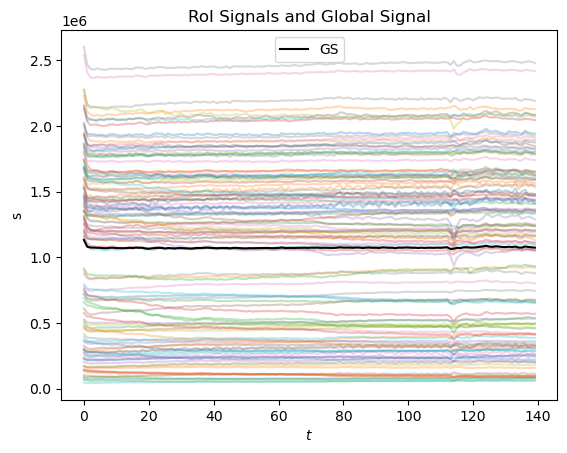

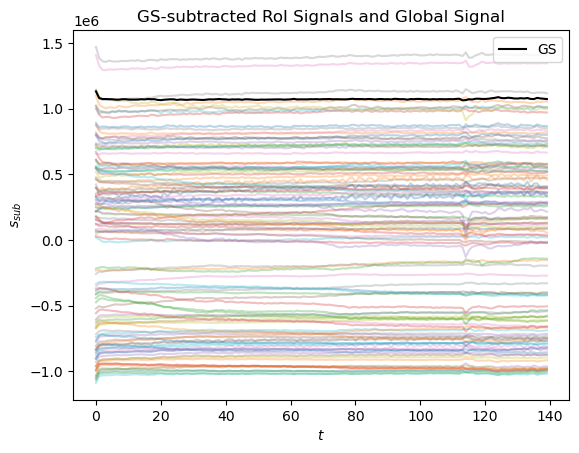

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


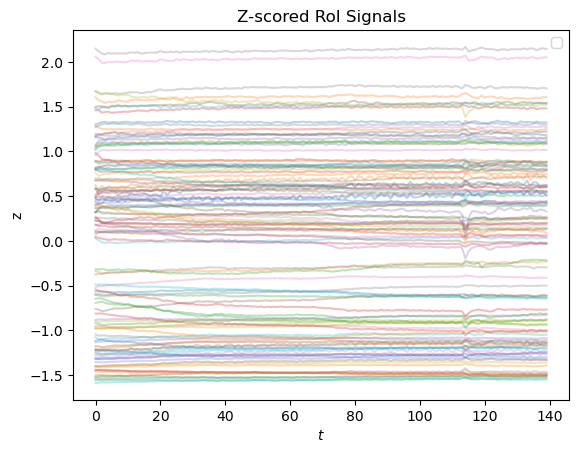

In [247]:
# Visualising signal transformation

for i in range(parc_img.shape[1]):
    plt.plot(range(len(parc_img[:, i])), parc_img[:, i], alpha=0.3, linestyle='-')
plt.plot(range(len(gs)), gs, color='black', label='GS')
plt.title("RoI Signals and Global Signal")
plt.xlabel("$t$")
plt.ylabel("s")
plt.legend()
plt.show()

for i in range(parc_img.shape[1]):
    plt.plot(range(len(sub_gs_img[:, i])), sub_gs_img[:, i], alpha=0.3, linestyle='-')
plt.plot(range(len(gs)), gs, color='black', label='GS')
plt.title("GS-subtracted RoI Signals and Global Signal")
plt.xlabel("$t$")
plt.ylabel("$s_{sub}$")
plt.legend()
plt.show()

for i in range(parc_img.shape[1]):
    plt.plot(range(len(z_img[:, i])), z_img[:, i], alpha=0.3)
# plt.plot(range(len(gs)), gs, label='GS')
plt.title("Z-scored RoI Signals")
plt.xlabel("$t$")
plt.ylabel("z")
plt.legend()
plt.show()

- The global max value of the z-scored signals is considered the upspin and the min the downspin. The binarization is done according to this.
- We remove field because it seems to be redundant and apparently has no effect in the phase space
- Check if it is possible to compare the absolute signals between two regions from fMRI or if the different mean signals are just an artifact of the local gradients from scanning. Also check if this can be negated in any way

$$
\\eps_i = c_{OL}.S_i + h_i S_i
\\eps_i = \sigma \eps (e^{-f(e)}/\sigma \eps^{-f(e)})
$$

## Relaxation Times

In [21]:
from scipy.stats import zscore

In [21]:
# def autocorr(x):
#     xp = x - np.mean(x)
#     n = len(x)
#     f = np.fft.fft(xp, n*2)
#     acf = np.real(np.fft.ifft(f * np.conjugate(f))[:n])
#     acf /= (4*np.var(x))
#     acf /= acf[0]
#     return acf

# def relaxation_time(x, tau_max=None, threshold=np.exp(-1)):
#     acf = autocorr(x)
#     if tau_max is None:
#         tau_max = len(x) // 10
#     idx = np.where(acf < threshold)[0]
#     if len(idx) == 0:
#         tau = tau_max
#     else:
#         tau = idx[0]
#     return tau

In [22]:
def autocorr(x):
    xp = x - np.mean(x)
    n = len(x)
    f = np.fft.fft(xp, n*2)
    acf = np.real(np.fft.ifft(f * np.conjugate(f))[:n])
    # acf /= (4*np.var(x))
    acf /= acf[0]
    return acf

from scipy.optimize import curve_fit

def exp_decay(t, tau, A, B=0):
    return A * np.exp(-t/tau) + B

def relaxation_time(x, t, t_max=None):
    if t_max is None:
        t_max = len(t) // 10
    p0 = [t[t_max], x[0]]
    B = np.mean(x[50:])
    func = lambda t, tau, A: exp_decay(t, tau, A, B=B)
    popt, pcov = curve_fit(func, t[:t_max], x[:t_max], p0=p0)
    tau = popt[0]
    A = popt[1]
    B = B
    return tau, A, B

In [23]:
# for sub in range(timeseries.shape[0]):
act = autocorr(k)
tau, A, B = relaxation_time(act, np.arange(len(act)))
plt.plot(act)
plt.plot(np.arange(len(act)), exp_decay(np.arange(len(act)), tau, A, B))

NameError: name 'timeseries' is not defined

In [11]:
subjects_list = list(set( [ '_'.join(i.split("_")[:3]) for i in os.listdir(z_root_dir) ]))
# subjects_list

In [12]:
dloader = DataLoader(z_root_dir, subjects_list=subjects_list)

In [13]:
ts_data = []
trunc_lim = 140
n_rois = 116
for sub in subjects_list:
    ts = dloader.get_z_region_output(sub)
    
    ts_data.append(ts[:trunc_lim])
ts_data = np.array(ts_data)
ts_data.shape

(88, 140, 116)

In [19]:
# Quality check
for ind in range(len(ts_data)):
    i = ts_data[ind]
    if i.shape != (140, 116):
        print(i.shape)
        print(dloader.subjects_list[ind])

In [39]:
threshold = np.exp(-1)
roi_rts = []

for roi_ind in range(ts_data.shape[2]):
    roi_sub_rts = []
#     print(f"Running for {roi_ind}")
    for sub_ind in range(ts_data.shape[0]):
#         signal = ts_data[sub_ind, :, roi_ind]
        signal = autocorr(ts_data[sub_ind, :, roi_ind])
#         rt = relaxation_time(signal, threshold=threshold)
        rt = relaxation_time(signal, list(range(len(signal))))
        roi_sub_rts.append(rt)
    roi_rts.append(roi_sub_rts)
roi_rts = np.array(roi_rts)
roi_rts.shape

/tmp/ipykernel_40862/567469790.py:13: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-t/tau) + B
/scratch/shivansh.seth/preproc/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(116, 88, 3)

In [34]:
roi_rts_taus = roi_rts[:, :, 0].T

In [35]:
cn_roi_rts = np.array([ roi_rts_taus[i] for i in range(roi_rts_taus.shape[0]) if dloader.diag[i] == 0 ])
ad_roi_rts = np.array([ roi_rts_taus[i] for i in range(roi_rts_taus.shape[0]) if dloader.diag[i] == 1 ])

In [36]:
cn_roi_rts_mean = np.mean(cn_roi_rts, axis=0)
ad_roi_rts_mean = np.mean(ad_roi_rts, axis=0)

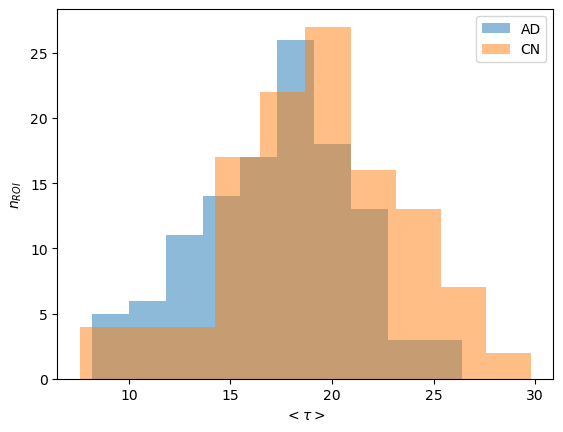

In [37]:
plt.hist(ad_roi_rts_mean, label='AD', alpha=0.5)
plt.hist(cn_roi_rts_mean, label='CN', alpha=0.5)
plt.legend()
plt.xlabel("$<\\tau>$")
plt.ylabel("$n_{ROI}$")
plt.show()

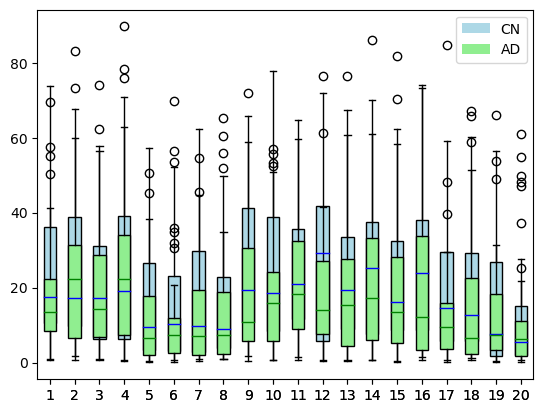

In [48]:
from matplotlib.patches import Patch

fig, ax = plt.subplots()

roi_start, roi_end = 90, 110
bp1 = ax.boxplot(cn_roi_rts[:, roi_start:roi_end], patch_artist=True)
bp2 = ax.boxplot(ad_roi_rts[:, roi_start:roi_end], patch_artist=True)

box_colors = ['lightblue', 'lightgreen']
median_colors = ['blue', 'green']
for bplot, box_color, median_color in zip([bp1, bp2], box_colors, median_colors):
    # change box color
    for patch in bplot['boxes']:
        patch.set_facecolor(box_color)
    # change median color
    for line in bplot['medians']:
        line.set_color(median_color)
        
color_patches = [ Patch(facecolor=box_colors[0], label=f'CN'), Patch(facecolor=box_colors[1], label=f'AD') ]
ax.legend(handles=color_patches)

# plt.show()

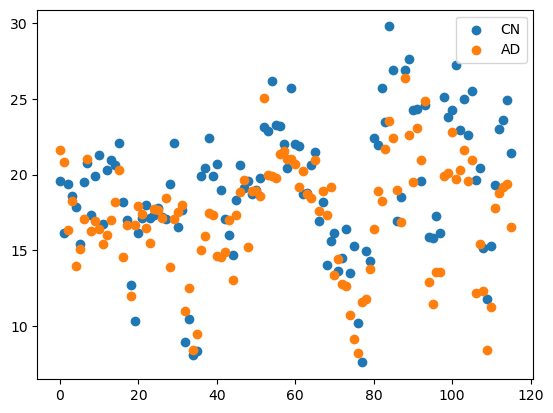

In [44]:
plt.scatter(range(len(cn_roi_rts_mean)), cn_roi_rts_mean, label='CN')
plt.scatter(range(len(ad_roi_rts_mean)), ad_roi_rts_mean, label='AD')
# plt.axhline(y=np.nanmean(cn_roi_rts_mean))
plt.legend()

### Transfer Entropy

In [209]:
import numpy as np
from sklearn.neighbors import KDTree
from scipy.special import digamma, psi

def transfer_entropy(x, y, k=3, lag=4):
    
    n_samples = len(x)
    x_lagged = x[:-lag]
    y_lagged = y[lag:]
    xy = np.concatenate([x_lagged.reshape(-1, 1), y_lagged.reshape(-1, 1)], axis=1)

    # Use KDTree to find k nearest neighbors
    tree = KDTree(xy)
    d = tree.query(xy, k=k+1)[0][:, k]
    phi_x = digamma(k) - digamma(n_samples - 1)
    phi_y = digamma(k) - digamma(n_samples - 1)
    phi_xy = psi(k) - np.mean(psi(d))

    te = (phi_y - phi_xy) - (phi_x - phi_xy)
    return te

In [211]:
transfer_entropy(ts_data[0, :, 30], ts_data[0, :, 84])

0.0

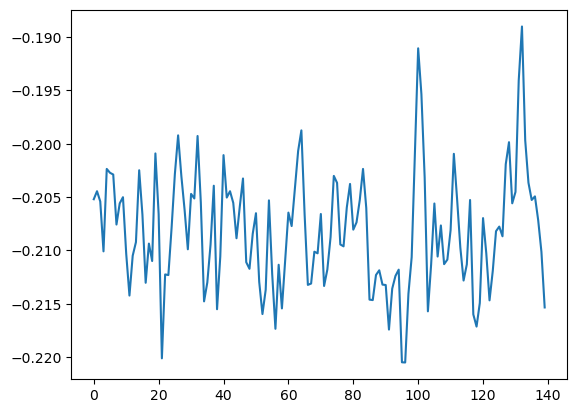

In [213]:
plt.plot(ts_data[0, :, 30])
plt.show()